<a href="https://colab.research.google.com/github/marinaefstratiou/blood_cells_ai/blob/main/cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# setting the paths to variables
root_path = '/content/drive/MyDrive/output' #absolute path
image_folder = f'{root_path}/IMG_20240226_133244'
! ls {root_path}

'Characteristics of Red blood cells2.txt'
'Characteristics of Red blood cells.docx'
'Characteristics of Red blood cells.txt'
 IMG_20211124_190304
 IMG_20211127_114809
 IMG_20211127_114817
 IMG_20211127_114832
 IMG_20211127_115612
 IMG_20211127_115629
 IMG_20211127_115638
 IMG_20211127_115642
 IMG_20211129_110325
 IMG_20211129_110351
 IMG_20211129_110356
 IMG_20211129_110402
 IMG_20211129_110410
 IMG_20211129_110421
 IMG_20211129_112213
 IMG_20211129_142329
 IMG_20211129_142333
 IMG_20211129_142339
 IMG_20211129_142349
 IMG_20211209_182940
 IMG_20211209_183004
 IMG_20211209_183014
 IMG_20211209_183023
 IMG_20211209_183029
 IMG_20211209_183053
 IMG_20211212_144701
 IMG_20211212_144707
 IMG_20211212_144713
 IMG_20211212_144719
 IMG_20211212_144723
 IMG_20211212_144740
 IMG_20220104_183834
 IMG_20220104_183911
 IMG_20220104_183943
 IMG_20220104_183949
 IMG_20220104_185047
 IMG_20220105_183047
 IMG_20220105_183057
 IMG_20220105_183105
 IMG_20220105_183303
 IMG_20220105_183312
 IMG_20220105_

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# to be able to convert images to numpy arrays
from PIL import Image

In [ ]:
# listing the files in the directory
files = os.listdir(image_folder)
image_paths = [i for i in files if i.endswith('.png')]
image_paths

['IMG_20240226_133244.png',
 'FilterObjectsSingleRed_8.png',
 'IMG_20240226_133244-original.png',
 'FilterObjectsSingleRed_9.png',
 'FilterObjectsSingleRed_2.png',
 'FilterObjectsSingleRed_1.png',
 'FilterObjectsSingleRed_10.png',
 'FilterObjectsSingleRed_11.png',
 'FilterObjectsSingleRed_3.png',
 'FilterObjectsSingleRed_5.png',
 'FilterObjectsSingleRed_4.png',
 'FilterObjectsSingleRed_6.png',
 'FilterObjectsSingleRed_7.png',
 'FilterObjectsSingleRed_12.png',
 'FilterObjectsSingleRed_56.png',
 'FilterObjectsSingleRed_50.png',
 'FilterObjectsSingleRed_47.png',
 'FilterObjectsSingleRed_20.png',
 'FilterObjectsSingleRed_31.png',
 'FilterObjectsSingleRed_45.png',
 'FilterObjectsSingleRed_55.png',
 'FilterObjectsSingleRed_41.png',
 'FilterObjectsSingleRed_40.png',
 'FilterObjectsSingleRed_51.png',
 'FilterObjectsSingleRed_33.png',
 'FilterObjectsSingleRed_18.png',
 'FilterObjectsSingleRed_17.png',
 'FilterObjectsSingleRed_13.png',
 'FilterObjectsSingleRed_35.png',
 'FilterObjectsSingleRed_2

In [ ]:
# opening all the images
images = pd.DataFrame({'image': [Image.open(f'{image_folder}/{i}') for i in image_paths], 'filename': image_paths})
images = images.set_index('filename')
images

,image
filename,
IMG_20240226_133244.png,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_8.png,<PIL.PngImagePlugin.PngImageFile image mode=RG...
IMG_20240226_133244-original.png,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_9.png,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_2.png,<PIL.PngImagePlugin.PngImageFile image mode=RG...
...,...
FilterObjectsSingleRed_69.png,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_70.png,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_57.png,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [ ]:
# opening the csv annotation file
image_annotation_path  = [f'{image_folder}/{i}' for i in files if i.endswith('.csv')]
annotations = pd.read_csv(image_annotation_path[1])
# GIve titles to the columns of the csv file
annotations.columns = ['filename', 'labels']
annotations = annotations.set_index('filename')
annotations

,labels
filename,
FilterObjectsSingleRed_10.png,[Artifacts]
FilterObjectsSingleRed_11.png,[Artifacts]
FilterObjectsSingleRed_12.png,[Artifacts]
FilterObjectsSingleRed_13.png,[Artifacts]
FilterObjectsSingleRed_14.png,[Artifacts]
...,...
FilterObjectsSingleRed_71.png,"[Dacryocytes1,Normochromic,Microcytes2]"
FilterObjectsSingleRed_72.png,"[Pycnocyes,NormalSpape,Microcytes2]"
FilterObjectsSingleRed_73.png,[Artifacts]


In [ ]:
annotations.loc[67]['labels'][1:-1].split(',')

['Dacryocytes1', 'Normochromic', 'Microcytes2']

In [ ]:
# Each field(entry) in the 'labels' column is a string that represents a list of labels
# For example: '[Dacryocytes1,Normochromic,Microcytes2]'
# In order to get a Python collection of the labels, we remove the brackets
# and split on comma each field of the column labels
cell_types = [labels[1:-1].split(',') for labels in annotations['labels']]
cell_types

[['Artifacts'],
 ['Artifacts'],
 ['Artifacts'],
 ['Artifacts'],
 ['Artifacts'],
 ['Artifacts'],
 ['Microcytes3', 'NormalSpape', 'Normochromic'],
 ['Artifacts'],
 ['Hyperchromic', 'Microcytes3', 'Ovalocytes'],
 ['Artifacts'],
 ['Artifacts'],
 ['Ovalocytes', 'OtherInclussions', 'Hypochromic1', 'Microcytosis1'],
 ['Acanthocytes', 'Microcytes3', 'OtherInclussions', 'Hyperchromic'],
 ['Acanthocytes', 'Spherocytes'],
 ['Artifacts'],
 ['Hyperchromic', 'Ovalocytes', 'Microcytes2'],
 ['Microcytosis1', 'Normochromic', 'Poikilo'],
 ['Hyperchromic', 'OtherInclussions', 'Poikilo', 'Microcytes2'],
 ['Artifacts'],
 ['Artifacts'],
 ['Ovalocytes', 'Hypochromic1', 'Microcytes2'],
 ['OtherInclussions', 'Hyperchromic', 'Microcytes3', 'Ovalocytes'],
 ['Artifacts'],
 ['Artifacts'],
 ['Dacryocytes1', 'Pycnocyes', 'Microcytes3'],
 ['OtherInclussions', 'Acanthocytes', 'Poikilo', 'Hypochromic1'],
 ['Spherocytes'],
 ['Artifacts'],
 ['Artifacts'],
 ['Spherocytes'],
 ['NormalSpape', 'Microcytes2', 'Normochromic'],

In [ ]:
# Creating a list with all cell types and appending every time we find a new type
# of cell that's not in the list
all_cell_types = []
for i in cell_types:
  for j in i:
    if j not in all_cell_types:
      all_cell_types.append(j)
all_cell_types

['Artifacts',
 'Microcytes3',
 'NormalSpape',
 'Normochromic',
 'Hyperchromic',
 'Ovalocytes',
 'OtherInclussions',
 'Hypochromic1',
 'Microcytosis1',
 'Acanthocytes',
 'Spherocytes',
 'Microcytes2',
 'Poikilo',
 'Dacryocytes1',
 'Pycnocyes',
 'BasophilicStippling']

In [ ]:
# annotations['Artifacts'] = annotations['labels'].str.contains('Artifacts')
# annotations

,labels,Artifacts
filename,,
FilterObjectsSingleRed_10.png,[Artifacts],True
FilterObjectsSingleRed_11.png,[Artifacts],True
FilterObjectsSingleRed_12.png,[Artifacts],True
FilterObjectsSingleRed_13.png,[Artifacts],True
FilterObjectsSingleRed_14.png,[Artifacts],True
...,...,...
FilterObjectsSingleRed_71.png,"[Dacryocytes1,Normochromic,Microcytes2]",False
FilterObjectsSingleRed_72.png,"[Pycnocyes,NormalSpape,Microcytes2]",False
FilterObjectsSingleRed_73.png,[Artifacts],True


In [ ]:
# Creating a boolean column for each cell type
for i in sorted(all_cell_types):
  annotations[i] = annotations['labels'].str.contains(i)
annotations


,labels,Artifacts,Acanthocytes,BasophilicStippling,Dacryocytes1,Hyperchromic,Hypochromic1,Microcytes2,Microcytes3,Microcytosis1,NormalSpape,Normochromic,OtherInclussions,Ovalocytes,Poikilo,Pycnocyes,Spherocytes
filename,,,,,,,,,,,,,,,,,
FilterObjectsSingleRed_10.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
FilterObjectsSingleRed_11.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
FilterObjectsSingleRed_12.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
FilterObjectsSingleRed_13.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
FilterObjectsSingleRed_14.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FilterObjectsSingleRed_71.png,"[Dacryocytes1,Normochromic,Microcytes2]",False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False
FilterObjectsSingleRed_72.png,"[Pycnocyes,NormalSpape,Microcytes2]",False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
FilterObjectsSingleRed_73.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Creating a dataset joining the annotations and images dataframes
dataset_df = annotations.join(images)
dataset_df

,labels,Artifacts,Acanthocytes,BasophilicStippling,Dacryocytes1,Hyperchromic,Hypochromic1,Microcytes2,Microcytes3,Microcytosis1,NormalSpape,Normochromic,OtherInclussions,Ovalocytes,Poikilo,Pycnocyes,Spherocytes,image
filename,,,,,,,,,,,,,,,,,,
FilterObjectsSingleRed_10.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_11.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_12.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_13.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_14.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,<PIL.PngImagePlugin.PngImageFile image mode=RG...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FilterObjectsSingleRed_71.png,"[Dacryocytes1,Normochromic,Microcytes2]",False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_72.png,"[Pycnocyes,NormalSpape,Microcytes2]",False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,<PIL.PngImagePlugin.PngImageFile image mode=RG...
FilterObjectsSingleRed_73.png,[Artifacts],True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,<PIL.PngImagePlugin.PngImageFile image mode=RG...


In [ ]:
# Turn the labels into a tensorflow tensor
import tensorflow as tf
labels_tensor = tf.convert_to_tensor(dataset_df[all_cell_types])
# tf.data.Dataset.from_tensor_slices
labels_tensor

<tf.Tensor: shape=(72, 16), dtype=bool, numpy=
array([[ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])>

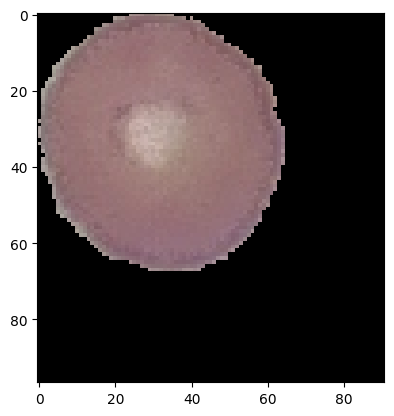

In [ ]:
# Turn the images into a tensorflow tensor so that we can use them in tensorflow
# We used dataset_df to get both tensors (labels_tensor and images_tensor) so
# that we are sure that the order of the tensor elements lines up

images_tensor = tf.ragged.constant([np.array(image) for image in dataset_df.image.to_list()]).to_tensor()
plt.imshow(images_tensor[0])

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices({'images':images_tensor, 'labels':labels_tensor})
dataset

<_TensorSliceDataset element_spec={'images': TensorSpec(shape=(97, 91, 3), dtype=tf.int32, name=None), 'labels': TensorSpec(shape=(16,), dtype=tf.bool, name=None)}>